In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.Country.value_counts()

United States    9994
Name: Country, dtype: int64

In [6]:
print(data.Segment.unique())

['Consumer' 'Corporate' 'Home Office']


In [7]:
data.City.value_counts()

New York City        915
Los Angeles          747
Philadelphia         537
San Francisco        510
Seattle              428
                    ... 
Vacaville              1
Portage                1
Montebello             1
Santa Maria            1
Arlington Heights      1
Name: City, Length: 531, dtype: int64

In [8]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
for i in [i for i in data.columns if data[i].dtype=='O']:
    if i == 'City':
        continue
    print(i , '========>', data[i].unique(),'\n')

Ship Mode ========> ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Segment ========> ['Consumer' 'Corporate' 'Home Office'] 

Country ========> ['United States'] 

State ========> ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia'] 

Region ========> ['South' 'West' 'Central' 'East'] 

Category ========> ['Furniture' 'Office Supplies' 'Technology'] 

Sub-Category ========> ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Pho

In [10]:
X = data.drop('Country', axis=1)

In [11]:
X.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
X_f = pd.get_dummies(X, columns = ['Category','Ship Mode','Segment','City','State','Region','Sub-Category'],drop_first=True)

In [13]:
X_f.head()

,Postal Code,Sales,Quantity,Discount,Profit,Category_Office Supplies,Category_Technology,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,41.9136,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,42420,731.9400,3,0.00,219.5820,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,90036,14.6200,2,0.00,6.8714,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,33311,957.5775,5,0.45,-383.0310,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,33311,22.3680,2,0.20,2.5164,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


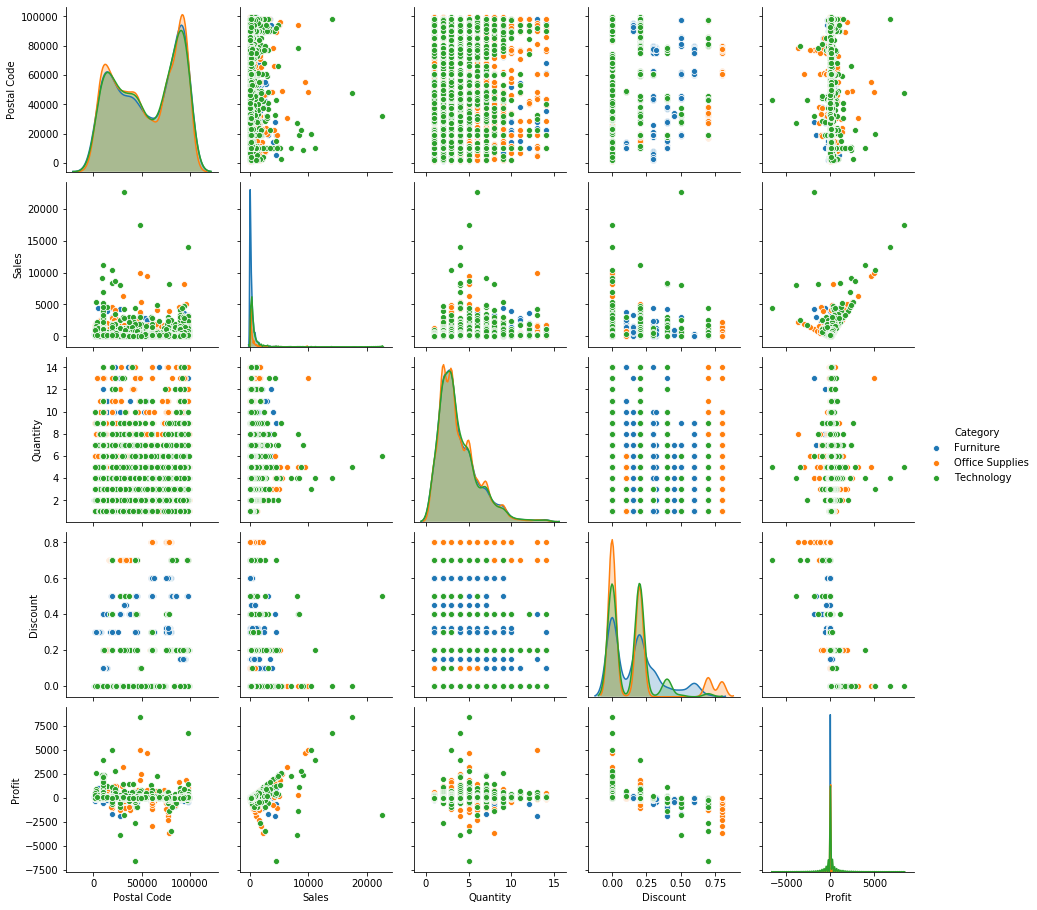

In [14]:
sns.pairplot(data,hue='Category')

In [36]:
df =data.groupby(['Category', 'Sub-Category']).agg(Mean_Profit =("Profit",'mean'))
df = df.reset_index()

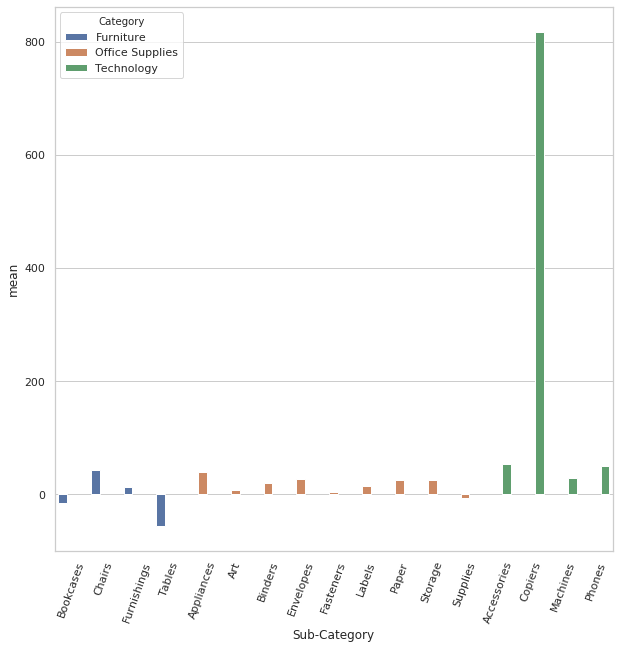

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x='Sub-Category', y='mean',hue='Category', data=df)
plt.xticks(rotation=70)
plt.show()

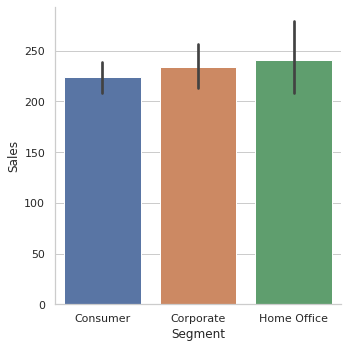

In [37]:
sns.catplot('Segment','Sales', kind='bar', data=data)

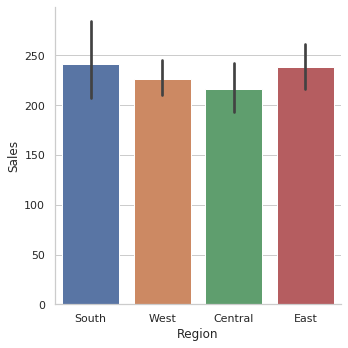

In [38]:
sns.catplot('Region','Sales', kind='bar', data=data)

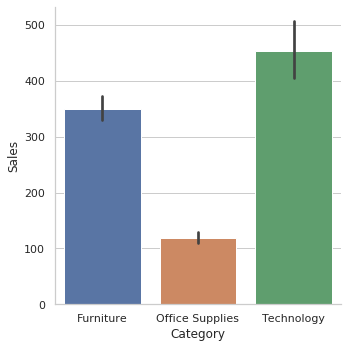

In [39]:
sns.catplot('Category','Sales', kind='bar', data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

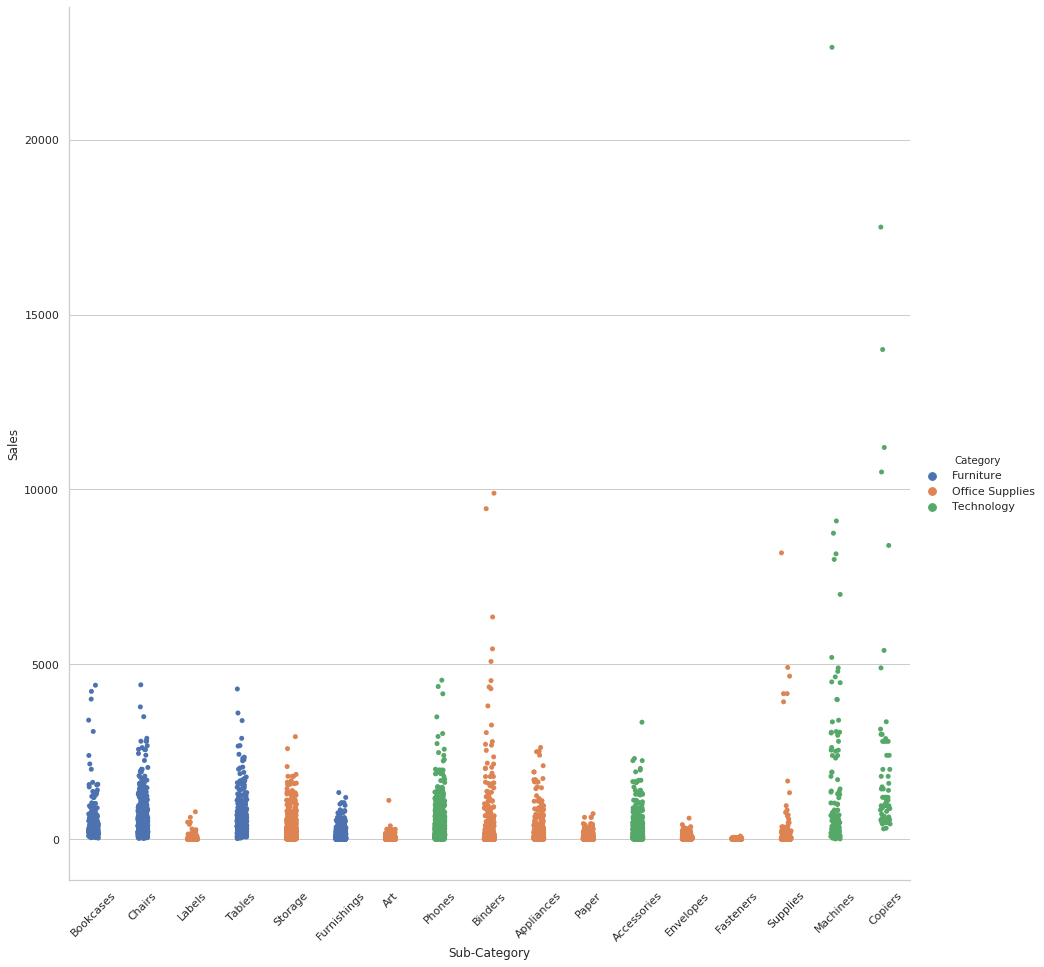

In [40]:
sns.catplot('Sub-Category','Sales',hue='Category',height=13, data=data)
plt.xticks(rotation=45)

In [41]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

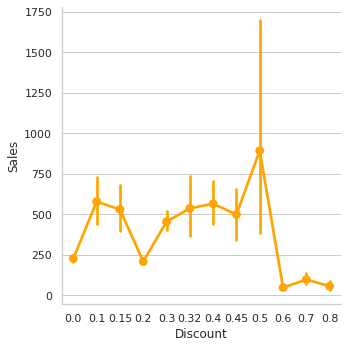

In [42]:
sns.catplot('Discount','Sales',kind='point',color= 'orange', data=data)

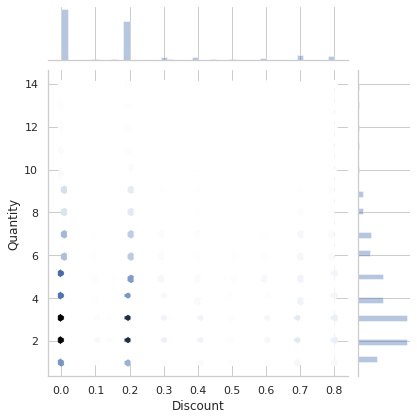

In [43]:
sns.jointplot(x=data.Discount,y=data.Quantity,kind='hex',data=data)

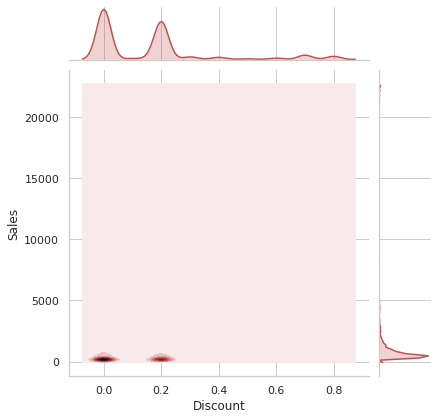

In [44]:
sns.jointplot(x=data.Discount,y=data.Sales,kind='kde',color = 'r',data=data)

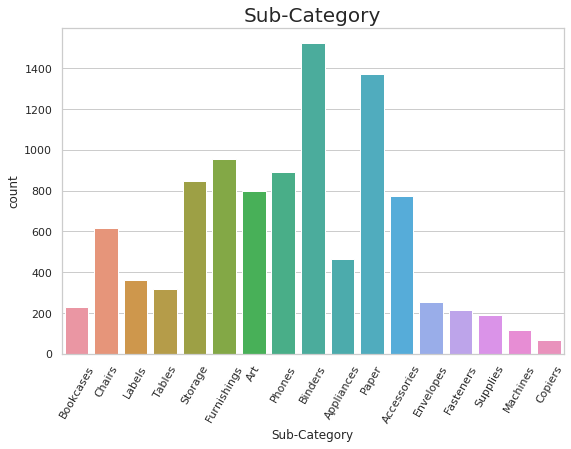

In [45]:

plt.figure(figsize=(9,6))
ax=sns.countplot(data['Sub-Category'],data=data)
plt.xticks(rotation=60)
plt.title('Sub-Category',fontsize=20)
plt.show()

In [46]:
ship = data.groupby(['Ship Mode'])['Discount'].sum().reset_index()
ship

,Ship Mode,Discount
0,First Class,253.17
1,Same Day,82.75
2,Second Class,270.15
3,Standard Class,955.02
